# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\16177\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key='6baed7c7488140128cfc6b371c0acab9') #api_key)   JON CHANGE BACK

In [4]:
api_key

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
BTC_News = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

BTC_News

{'status': 'ok',
 'totalResults': 8752,
 'articles': [{'source': {'id': None, 'name': 'New York Times'},
   'author': 'Jonah E. Bromwich',
   'title': 'Ex-Party Producer Charged in $2.7 Million Bitcoin-Laundering Scheme',
   'description': 'Thomas Spieker’s clients included dark-web drug dealers and a cellphone-hacking identity thief, prosecutors said.',
   'url': 'https://www.nytimes.com/2022/03/24/nyregion/thomas-spieker-bitcoin-scheme.html',
   'urlToImage': 'https://static01.nyt.com/images/2022/03/24/nyregion/24ny-bitcoin1/24ny-bitcoin1-facebookJumbo.jpg',
   'publishedAt': '2022-03-24T22:50:30Z',
   'content': 'Mr. Spiekers most prominent customer, whom he described as his whale client, was the Eastern European organized crime member, prosecutors said. Mr. Spieker laundered $620,000 for the client, they sai… [+2755 chars]'},
  {'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Gian M. Volpicelli',
   'title': 'What Twitter Is Really Planning for Crypto',
   'description': 

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ETH_News = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

ETH_News

{'status': 'ok',
 'totalResults': 4679,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': "Hackers swipe nearly $600 million from a 'play to earn' crypto game",
   'description': 'Digital thieves just pulled off another major crypto heist. Motherboard has learned hackers stole 173,600 Ethereum (about $591.2 million) from the Ronin blockchain that powers Axie Infinity, a popular "play to earn" game where players can receive crypto in ex…',
   'url': 'https://www.engadget.com/axie-infnity-ronin-network-crypto-theft-194014547.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-03/6875e130-af90-11ec-ae65-a8e40222540c',
   'publishedAt': '2022-03-29T19:40:14Z',
   'content': 'Digital thieves just pulled off another major crypto heist. Motherboard has learned hackers stole 173,600 Ethereum (about $591.2 million) from the Ronin blockchain that powers Axie Infinity, a popula… [+1462 chars]'},
  {'source': {'id': 'wire

In [7]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
BTC_Sentiment = []

for articles in BTC_News["articles"]:  # .... well shit... I gotta see the outputs
    try:
        text = articles["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        BTC_Sentiment.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
bitcoin = pd.DataFrame(BTC_Sentiment)      
        
bitcoin      

,text,compound,positive,negative,neutral
0,"Mr. Spiekers most prominent customer, whom he ...",-0.2280,0.072,0.097,0.831
1,"You might have heard of crypto Twitter, the co...",-0.2732,0.000,0.057,0.943
2,German authorities have seized $25.2 million U...,0.0000,0.000,0.000,1.000
3,The wallet will have USB-C and a fingerprint r...,-0.4404,0.000,0.088,0.912
4,"Bitcoin hit a milestone Friday ""that gets the ...",-0.4215,0.000,0.076,0.924
5,"Other fund vehicles hold crypto directly, but ...",-0.1154,0.116,0.154,0.730
6,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000
7,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",0.4939,0.123,0.000,0.877
8,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831
9,"This week, the cryptocurrency network Ronin di...",-0.4215,0.051,0.098,0.851


In [8]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ETH_Sentiment = []

for articles in ETH_News["articles"]:  # .... well shit... I gotta see the outputs
    try:
        text = articles["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ETH_Sentiment.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
ethereum = pd.DataFrame(ETH_Sentiment)      
        
ethereum 

,text,compound,positive,negative,neutral
0,Digital thieves just pulled off another major ...,-0.5106,0.000,0.102,0.898
1,"This week, the cryptocurrency network Ronin di...",-0.4215,0.051,0.098,0.851
2,April 5 (Reuters) - Ethereum blockchain scalin...,0.0000,0.000,0.000,1.000
3,His name is Vitalik Buterin and after dedicati...,0.0000,0.000,0.000,1.000
4,Regulatory solutions should be codified region...,0.7430,0.323,0.083,0.594
5,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713
6,We are excited to bring Transform 2022 back in...,0.8555,0.251,0.000,0.749
7,Non-fungible tokens have risen in interest and...,0.8676,0.270,0.048,0.682
8,The cryptocurrency boom over the past few year...,-0.1531,0.000,0.045,0.955
9,The cryptocurrency boom over the past few year...,0.0000,0.000,0.000,1.000


In [9]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin.describe() #not sure what I'm naming it yet...

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.038765,0.053900,0.055400,0.890750
std,0.396356,0.052667,0.054676,0.066786
min,-0.771300,0.000000,0.000000,0.730000
25%,-0.344025,0.000000,0.000000,0.850750
50%,-0.057700,0.056500,0.054500,0.889000
75%,0.323650,0.083000,0.092500,0.924000
max,0.636900,0.171000,0.169000,1.000000


In [10]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.237295,0.093200,0.024250,0.882500
std,0.431273,0.114398,0.036596,0.131098
min,-0.510600,0.000000,0.000000,0.594000
25%,0.000000,0.000000,0.000000,0.818750
50%,0.000000,0.025500,0.000000,0.908000
75%,0.586700,0.177500,0.048500,1.000000
max,0.867600,0.323000,0.102000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the higher mean positive ETH 0.093200 vs. BTC 0.053900

Q: Which coin had the highest compound score?

A: ETH at 0.867600	 was higher than BTC 0.636900

Q. Which coin had the highest positive score?

A: ETH at 0.323000 was higher than BTC 0.171000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
WNLemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addons = {'said', 'mln', 'kilolitres','kl'}

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    root_words = [WNLemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = list(filter(lambda w: w.lower(), words))
    
    # Remove the stop words
    tokens = list(filter(lambda t: t.lower() not in sw, words))    
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin["tokens"] = bitcoin.text.apply(tokenizer)
bitcoin

,text,compound,positive,negative,neutral,tokens
0,"Mr. Spiekers most prominent customer, whom he ...",-0.2280,0.072,0.097,0.831,"[Mr, Spiekers, prominent, customer, described,..."
1,"You might have heard of crypto Twitter, the co...",-0.2732,0.000,0.057,0.943,"[might, heard, crypto, Twitter, corner, social..."
2,German authorities have seized $25.2 million U...,0.0000,0.000,0.000,1.000,"[German, authorities, seized, million, USD, Bi..."
3,The wallet will have USB-C and a fingerprint r...,-0.4404,0.000,0.088,0.912,"[wallet, USBC, fingerprint, reader, Image, Jes..."
4,"Bitcoin hit a milestone Friday ""that gets the ...",-0.4215,0.000,0.076,0.924,"[Bitcoin, hit, milestone, Friday, gets, world,..."
5,"Other fund vehicles hold crypto directly, but ...",-0.1154,0.116,0.154,0.730,"[fund, vehicles, hold, crypto, directly, theyr..."
6,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000,"[Russia, invaded, Ukraine, Niki, Proshin, alre..."
7,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",0.4939,0.123,0.000,0.877,"[SAN, SALVADOR, March, Reuters, El, Salvador, ..."
8,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831,"[Bitcoin, seen, many, libertarianleaning, fans..."
9,"This week, the cryptocurrency network Ronin di...",-0.4215,0.051,0.098,0.851,"[week, cryptocurrency, network, Ronin, disclos..."


In [15]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum["tokens"] = ethereum.text.apply(tokenizer)
ethereum

,text,compound,positive,negative,neutral,tokens
0,Digital thieves just pulled off another major ...,-0.5106,0.000,0.102,0.898,"[Digital, thieves, pulled, another, major, cry..."
1,"This week, the cryptocurrency network Ronin di...",-0.4215,0.051,0.098,0.851,"[week, cryptocurrency, network, Ronin, disclos..."
2,April 5 (Reuters) - Ethereum blockchain scalin...,0.0000,0.000,0.000,1.000,"[April, Reuters, Ethereum, blockchain, scaling..."
3,His name is Vitalik Buterin and after dedicati...,0.0000,0.000,0.000,1.000,"[name, Vitalik, Buterin, dedicating, cover, re..."
4,Regulatory solutions should be codified region...,0.7430,0.323,0.083,0.594,"[Regulatory, solutions, codified, regionally, ..."
5,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713,"[sounds, good, true, youre, wrong, Yield, farm..."
6,We are excited to bring Transform 2022 back in...,0.8555,0.251,0.000,0.749,"[excited, bring, Transform, back, inperson, Ju..."
7,Non-fungible tokens have risen in interest and...,0.8676,0.270,0.048,0.682,"[Nonfungible, tokens, risen, interest, value, ..."
8,The cryptocurrency boom over the past few year...,-0.1531,0.000,0.045,0.955,"[cryptocurrency, boom, past, years, helped, pr..."
9,The cryptocurrency boom over the past few year...,0.0000,0.000,0.000,1.000,"[cryptocurrency, boom, past, years, helped, pr..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
BTC_string = ' '.join(bitcoin.text)
BTC_processed = tokenizer(BTC_string)
BTC_ngrams = Counter(ngrams(BTC_processed, n=2))


In [18]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ETH_string = ' '.join(ethereum.text)
ETH_processed = tokenizer(ETH_string)
ETH_ngrams = Counter(ngrams(ETH_processed, n=2))

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):  #3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)



In [20]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE! ------------geez... maybe go back up to take out "Mr"
bitcoin_top10 = token_count(BTC_processed)
bitcoin_top10 

[('chars', 20),
 ('Bitcoin', 9),
 ('crypto', 7),
 ('March', 7),
 ('Reuters', 7),
 ('million', 5),
 ('bitcoin', 5),
 ('week', 5),
 ('cryptocurrency', 4),
 ('Mr', 2)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_top10 = token_count(ETH_processed)
ethereum_top10 

[('chars', 20),
 ('past', 8),
 ('cryptocurrency', 7),
 ('Ethereum', 6),
 ('digital', 6),
 ('Ronin', 4),
 ('blockchain', 4),
 ('Reuters', 4),
 ('boom', 4),
 ('years', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

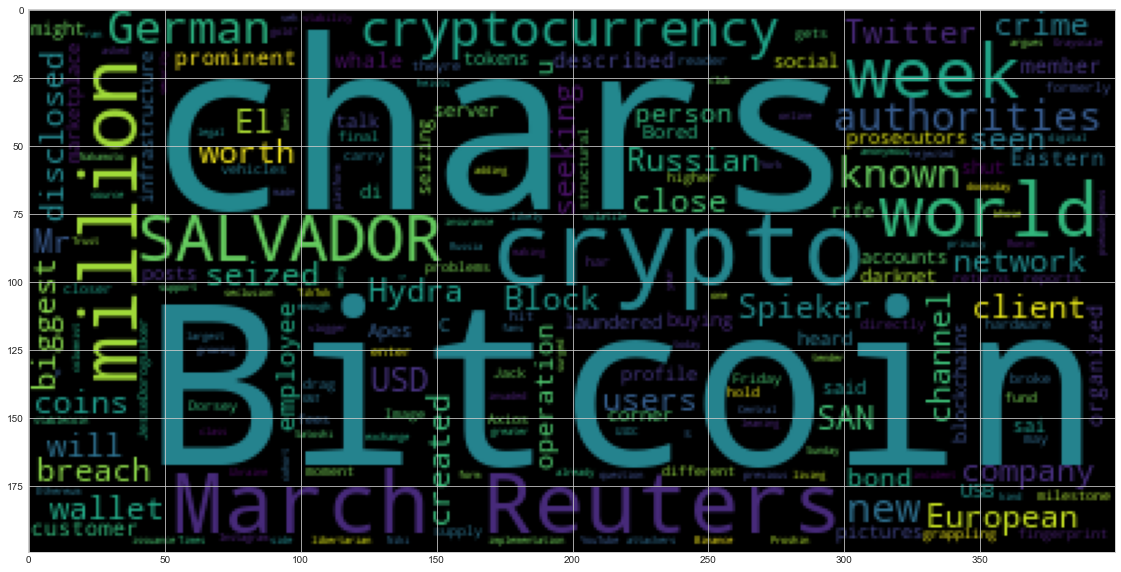

In [23]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(BTC_string)
plt.imshow(wc)


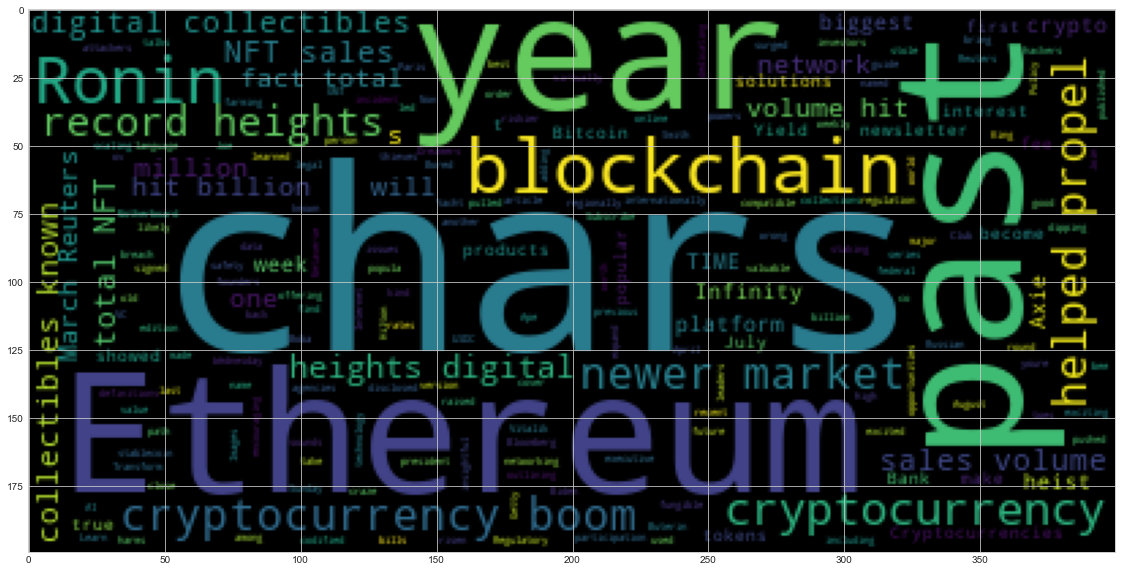

In [24]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(ETH_string)
plt.imshow(wc)


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
import string
import re

BTC_string_clean = BTC_string.translate(str.maketrans('', '', string.punctuation))
BTC_string_clean

'Mr Spiekers most prominent customer whom he described as his whale client was the Eastern European organized crime member prosecutors said Mr Spieker laundered 620000 for the client they sai… 2755 chars You might have heard of crypto Twitter the corner of the social network where accounts have Bored Apes as profile pictures posts are rife with talk of tokens blockchains and buying the Bitcoin di… 3133 chars German authorities have seized 252 million USD in Bitcoin\r\nGerman authorities shut down the server infrastructure for the Russian darknet marketplace Hydra seizing 23 million 252 million USD … 2344 chars The wallet will have USBC and a fingerprint reader  Image JesseDorogusker on Twitter\r\n\n \n\n We may have just seen the Bitcoin hardware wallet that Jack Dorsey’s Block the company formerly known … 1777 chars Bitcoin hit a milestone Friday that gets the world ever closer to the moment when the final new bitcoin will enter the world reports Axios The supply of coins broke 19 mil

In [29]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
BTC_doc = nlp(BTC_string_clean)


# Add a title to the document
# YOUR CODE HERE!
BTC_doc.user_data["title"] = "Bitcoin NERds Unite!"

In [30]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(BTC_doc, style='ent')

In [31]:
# List all Entities
# YOUR CODE HERE!
BTC_doc.ents

(Eastern European,
 Mr Spieker,
 620000,
 2755,
 Bored Apes,
 Bitcoin,
 German,
 252 million USD,
 Bitcoin,
 German,
 Russian,
 Hydra,
 23 million 252 million USD,
 Twitter,
 Jack Dorsey’s,
 Friday,
 19,
 641,
 Grayscale Bitcoin Trust,
 2273,
 Russia,
 Ukraine,
 a year,
 YouTube,
 Instagram,
 Russian,
 5883,
 SAN SALVADOR,
 March 23,
 Reuters,
 El Salvador,
 Binance,
 Central,
 1109,
 the New York Times,
 This week,
 Ronin,
 540 million,
 Ethereum,
 USDC,
 3084,
 March 27,
 Reuters,
 441,
 2207,
 Sunday,
 196364,
 411,
 353,
 March 22,
 Reuters,
 Whose,
 Satoshi Nakamoto,
 2008,
 Block,
 today,
 82 million,
 Cash App,
 SEC,
 December 10th,
 1646,
 Authorities,
 this week,
 German,
 US,
 Hydra Market,
 1524,
 Heres,
 this week,
 Getty
 Welcome to,
 weekly,
 this week,
 2860,
 LONDON,
 March 31,
 Reuters,
 European Union,
 Thursday,
 2266,
 March 29,
 Reuters,
 first quarter,
 2 trillion,
 4359,
 SAN SALVADOR,
 March 22,
 Reuters,
 El Salvador,
 last week,
 finan,
 1425,
 March 21,
 Reut

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ETH_string_clean = ETH_string.translate(str.maketrans('', '', string.punctuation))
ETH_string_clean

'Digital thieves just pulled off another major crypto heist Motherboard has learned hackers stole 173600 Ethereum about 5912 million from the Ronin blockchain that powers Axie Infinity a popula… 1462 chars This week the cryptocurrency network Ronin disclosed a breach in which attackers made off with 540 million worth of Ethereum and USDC stablecoin The incident which is one of the biggest heists in… 3084 chars April 5 Reuters  Ethereum blockchain scaling platform Boba Network raised 45 million in its series A round with participation from investors including Will Smithled Dreamers VC Paris Hilton an… 1335 chars His name is Vitalik Buterin and after dedicating the cover of its most recent edition to him TIME has named him the King of Cryptocurrencies \r\nBloomberg  Getty Images\r\n The 28yearold Russian is … 2627 chars Regulatory solutions should be codified regionally and internationally through compatible language and legal definitions Policy solutions like online harms and safety bil

In [33]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ETH_doc = nlp(ETH_string_clean)


# Add a title to the document
# YOUR CODE HERE!
ETH_doc.user_data["title"] = "Ethereum NERds Unite!"

In [34]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ETH_doc, style='ent')

In [35]:
# List all Entities
# YOUR CODE HERE!
ETH_doc.ents

(Digital,
 Motherboard,
 173600,
 Ethereum,
 about 5912 million,
 Ronin,
 Axie Infinity,
 1462,
 This week,
 Ronin,
 540 million,
 Ethereum,
 USDC,
 3084,
 April 5,
 Reuters,
 Boba Network,
 45 million,
 Will Smithled Dreamers,
 Paris Hilton,
 1335,
 Vitalik Buterin,
 TIME,
 Bloomberg  Getty Images,
 28yearold,
 Russian,
 2627,
 Regulatory,
 5103,
 Yield,
 Transform,
 July 19,
 July 20,
 Learn More,
 6,
 2977,
 the last year,
 Bored Ape Yacht Club,
 one,
 Ethereum,
 1535,
 the past few years,
 NFT,
 25 billion,
 the past few years,
 NFT,
 24 billion,
 the past… 2741,
 Joe Biden,
 Wednesday,
 2590,
 TIME,
 the Metaverse Subscribe,
 weekly,
 15336,
 March 27,
 Reuters,
 441,
 2207,
 Sunday,
 196364,
 411,
 353,
 the past few years,
 NFT,
 23 billion,
 2633,
 the past few years,
 NFT,
 23 billion,
 Ethereum,
 1852,
 NEW YORK,
 March 21,
 Reuters,
 a second straight week,
 CoinShares,
 Monday,
 2322,
 March 24,
 Reuters,
 Leumi LUMITA,
 first,
 Israeli,
 Pepper Invest,
 Thursday,
 US,
 764

---